 # Airbnb case

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling


In [3]:
df=pd.read_csv('../data/listings.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9784567,nice Room in Amsterdam,27280608,Petra,NaN,Bijlmer-Oost,52.323369,4.977730,Private room,95,1,5,2016-06-27,0.81,3,365
1,13163805,Best cost benefit room near a metro station,35491461,Phillip,NaN,Bijlmer-Oost,52.315635,4.978166,Private room,60,1,4,2016-06-27,4.00,1,77
2,3719167,Nice room in A´dam SE near nature & heart centre,18991270,Maria,NaN,Bijlmer-Oost,52.316711,4.986618,Private room,45,5,11,2016-01-02,0.48,1,23
3,13188367,Private room 15min metro ride from city center,73797940,Diana,NaN,Bijlmer-Oost,52.321204,4.976630,Private room,35,1,2,2016-05-31,1.62,1,10
4,4831606,Room in Amsterdam in a new house!! Free Bicycle,24314617,Jorim,NaN,Bijlmer-Oost,52.327270,4.967352,Private room,39,14,12,2016-03-22,0.65,1,338


In [10]:
df['last_review']=pd.to_datetime(df['last_review'], yearfirst=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9784567,nice Room in Amsterdam,27280608,Petra,NaN,Bijlmer-Oost,52.323369,4.977730,Private room,95,1,5,2016-06-27,0.81,3,365
1,13163805,Best cost benefit room near a metro station,35491461,Phillip,NaN,Bijlmer-Oost,52.315635,4.978166,Private room,60,1,4,2016-06-27,4.00,1,77
2,3719167,Nice room in A´dam SE near nature & heart centre,18991270,Maria,NaN,Bijlmer-Oost,52.316711,4.986618,Private room,45,5,11,2016-01-02,0.48,1,23
3,13188367,Private room 15min metro ride from city center,73797940,Diana,NaN,Bijlmer-Oost,52.321204,4.976630,Private room,35,1,2,2016-05-31,1.62,1,10
4,4831606,Room in Amsterdam in a new house!! Free Bicycle,24314617,Jorim,NaN,Bijlmer-Oost,52.327270,4.967352,Private room,39,14,12,2016-03-22,0.65,1,338


In [11]:
df.drop(axis=1, columns=['id','name','host_id','host_name','neighbourhood_group'], inplace=True)

/home/ant_on_su/miniconda3/envs/case/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ant_on_su/miniconda3/envs/case/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


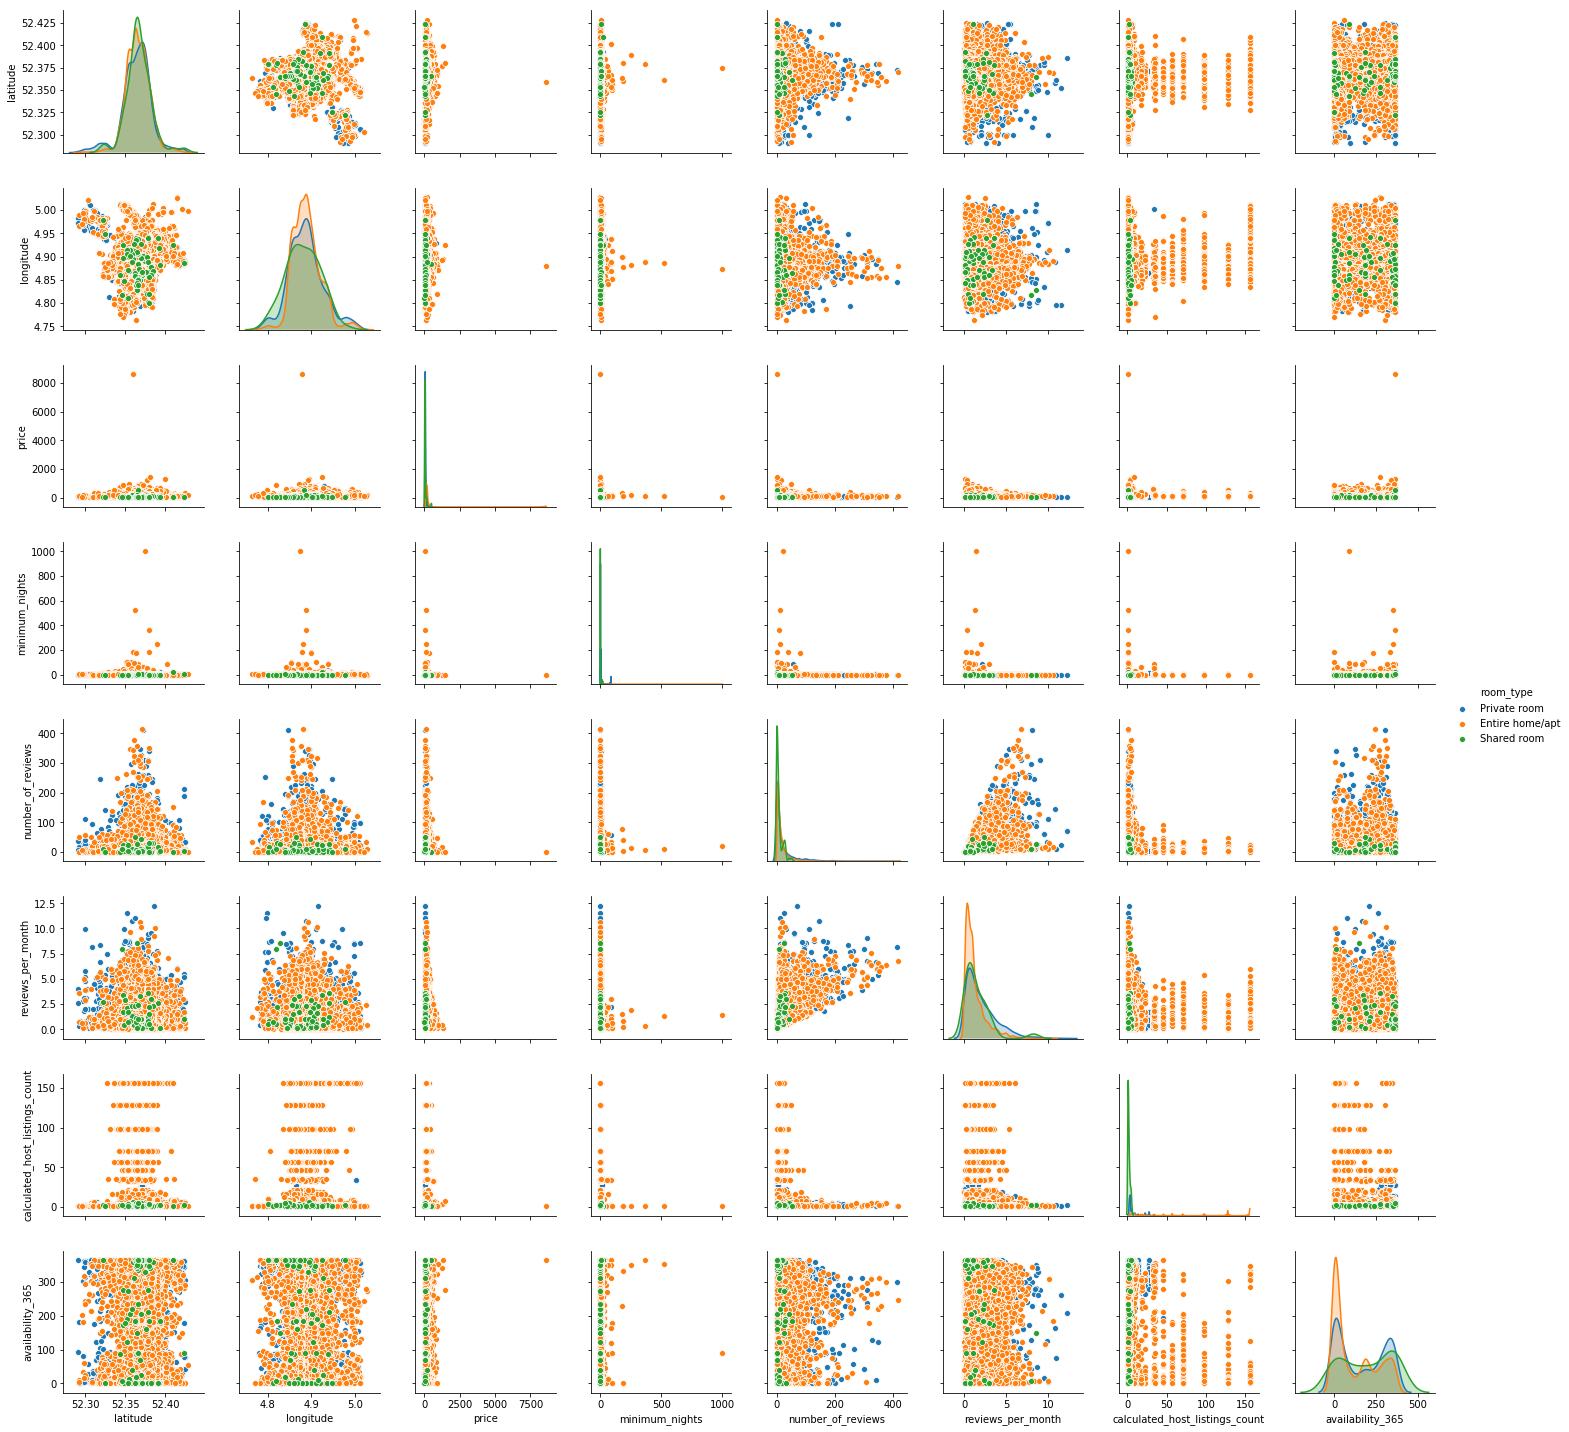

In [26]:
%matplotlib inline
import seaborn as sns

sns.pairplot(df, hue='room_type')


[(0, 400)]

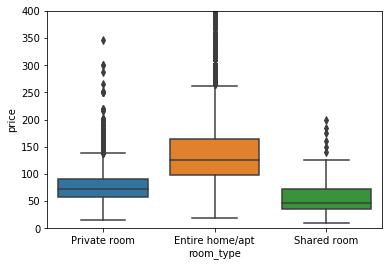

In [28]:
box=sns.boxplot(data=df, x='room_type', y='price')
box.set(ylim=(0, 400))

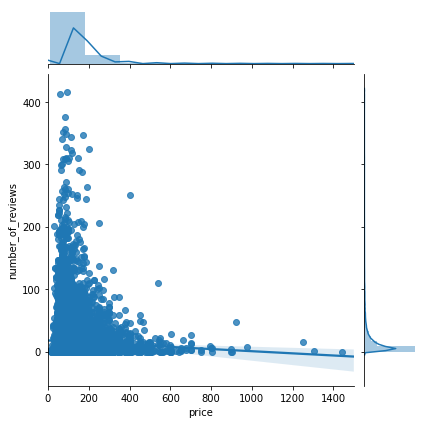

In [22]:
sns.jointplot(df.price, df.number_of_reviews, kind='reg', xlim=(0,1500))

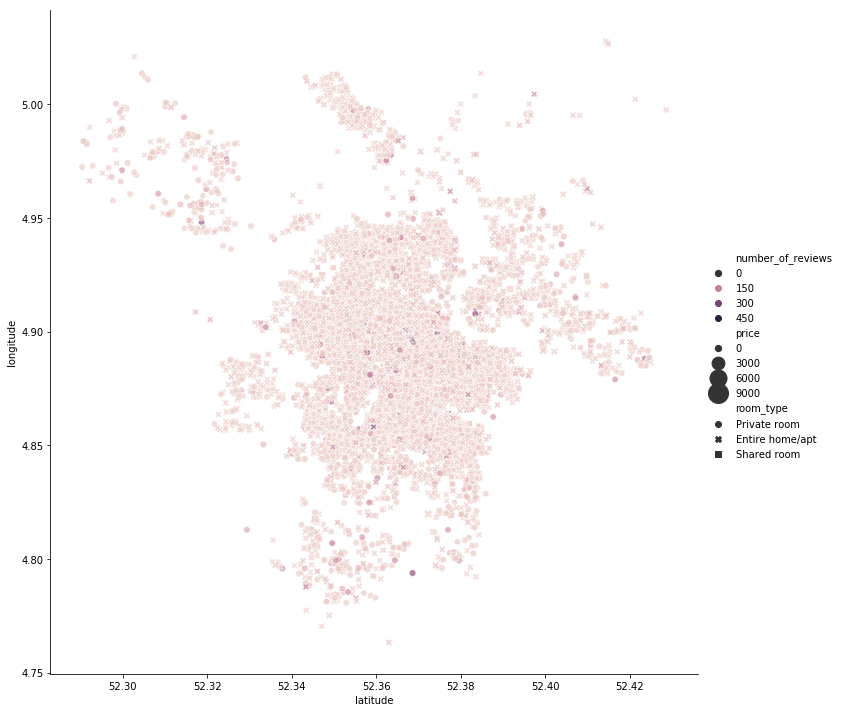

In [42]:
sns.relplot(x='latitude', y='longitude', style='room_type', size='price', hue='number_of_reviews', alpha=0.7, data=df, sizes=(40, 400), height=10)

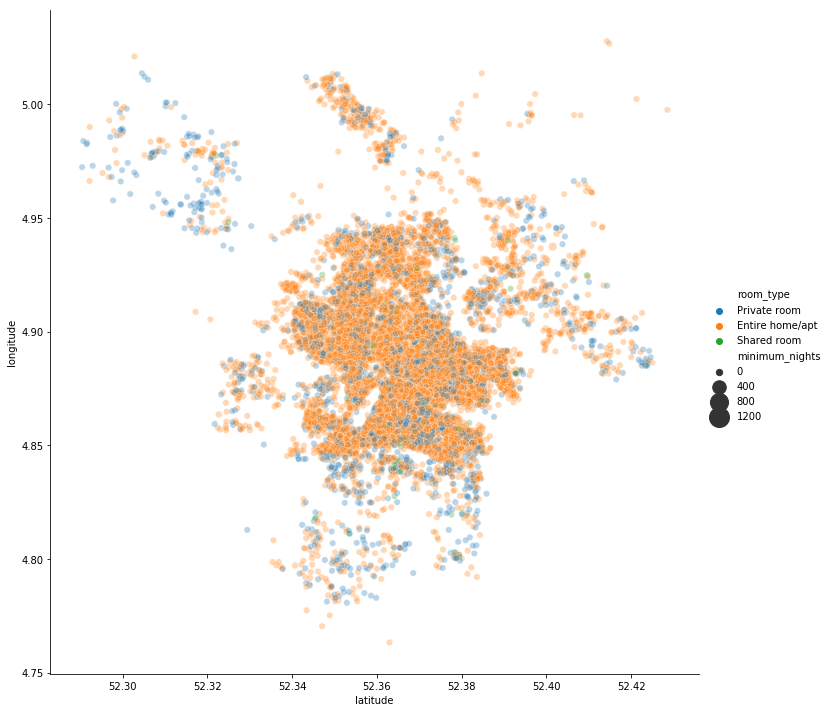

In [35]:
sns.relplot(x='latitude', y='longitude', hue='room_type', size='minimum_nights', alpha=0.3, data=df, sizes=(40, 400), height=10)